# Python Machine Learning - SVMs and SVR
<p><a name="sections"></a></p>


<p><a name="svm"></a></p>
## Support Vector Machines

- Support vector machines (SVMs) are supervised learning methods used for classification analysis.

- Unlike linear discriminant analysis or logistic regression, SVMs approach the two-class classification problem in a direct way: construct linear decision boundaries, by explicitly separating the data in two different classes as well as possible.

- The decision boundaries are called hyperplanes in the feature space.


### Hyperplanes

A hyperplane of a *p-dimensional* space *V* is a subspace of dimension *p-1*.

- A hyperplane can be described with a single linear equation of the form (in Cartesian coordinates):

$$\beta_0 + \beta_1 X_1 + ... + \beta_p X_p = 0$$

  - It is more convenient to be written in the matrix form $\beta_0 + \beta^T X = 0$, where $\beta = (\beta_1, ... \beta_p)$ and $X = (X_1, ... X_p)$ are *p-dimensional* vectors.
  
  - In a 2-dimensional space, a hyperplane is a line and in a 3-dimensional space it is a plane.


- The coefficient vector $\beta$ is the **normal vector** - a vector orthogonal to the surface of that hyperplane.

- In some cases we need to work with the normalized form: $\beta^* = \beta / \lvert \beta \rvert$, or equivalently, to require that $\sum_i^p \beta_i^2 = 1$

Some properties:

- For any point $x_0$ in the hyperplane, $\beta^T x_0 = -\beta_0$

- For any two points $x_1$ and $x_2$ lying in the hyperplane, we always have $\beta^T (x_1 - x_2) = 0$, that is, the normal vector $\beta$ is perpendicular to any vectors within the hyperplane.

- The signed distance of any point $x$ to the hyperplane is given by:

$$f(x) = \frac{1}{\lvert \beta \rvert}(\beta^T x + \beta_0)$$


### Separating Hyperplanes

- If we assume that the data can be well separated by a hyperplane defined by $f(X) = \beta_0 + \beta^T X = 0$, then:

  - $f(X) > 0$, for points on one side of the hyperplane,
  - $f(X) < 0$, for points on the other side.

- We coded the two classes as:

  - $y = 1$, for $f(X) > 0$
  - $y = -1$, for $f(X) < 0$

- The distances times the classes become positive: $y_i \cdot f(X_i) > 0$

### Optimal Separating Hyperplanes

- Goal: to maximize the margin, defined by the distance from the data point to a hyperplane,  between the two classes on the training data.

- The data points that are used to determine the margins are called support vectors.


### Maximal Margin Classifier

The optimal separating hyperplane leads to a constrained optimization problem:

$$\underset{\beta_0, \lvert \beta \rvert = 1}{\mathrm{max}} M$$

$$\mbox{subject to  }y_i(x_i^T \beta + \beta_0) \geq M, i = 1, ..., N$$

The set of conditions ensure that the distances from all the points to the decision boundary defined by $\beta$ and $\beta_0$ are at least $M$, and we seek the largest $M$ by varying the parameters.

We can get rid of the constraint $\lvert \beta \rvert = 1$ by replacing the condition with:

$$y_i(x_i^T \beta + \beta_0) \geq M \lvert \beta \rvert$$

For any $\beta$ and $\beta_0$ satisfying the inequalities, any positively scaled multiple satisfies them too. If we set $\lvert \beta \rvert = 1/M$, we can rephrase the problem to a more convenient form by dropping the norm constraint on $\beta$:

$$\underset{\beta_0, \beta}{\mathrm{min}} \frac{1}{2}\lvert \beta \rvert^2$$

$$\mbox{subject to  }y_i(x_i^T \beta + \beta_0) \geq 1$$

This is a convex quadratic problem, and can be solved efficiently.

### Noisy Data

- The technique for constructing an optimal separating hyperplane can be applied to cases of two perfectly separated classes.

- However, sometimes the data can be noisy, which can lead to a poor solution for the maximal margin classifier.


### Non-separable Data

- Even worse, quite often the data is not separable by a linear boundary.

- What shall we do?


### The Support Vector Classifier

- To tolerate noise and errors, we still maximize M but meanwhile allow some points to be on the wrong side of the hyperplane.

- We introduce “slack” variables $\epsilon = (\epsilon_1, ... \epsilon_N)$ with $\epsilon_i \geq 0$ and $\sum_i \epsilon_i \leq \mbox{Const}$, and modify the optimization problem to be:

$$
\underset{\beta_0, \epsilon, \lvert \beta \rvert = 1}{\mathrm{max}} M
$$

$$
\mbox{ subject to }
\begin{cases}
y_i(x_i^T \beta + \beta_0) \geq M (1 - \epsilon_i)
\\
\epsilon_i \geq 0 \mbox{, and } \sum_i \epsilon_i \leq \mbox{Const}
\end{cases}
$$

- $\epsilon_i$ are proportional to the amount by which the prediction is on the wrong side of their margin. 
- Misclassifications occur when $\epsilon_i > 1$. So given that the constraint $\sum \epsilon_i = \mbox{Const}$, the total number of misclassifications will be bounded by $\mbox{Const}$.

- The effect of the data points that fall into the margin will be penalized by the slack variable $\epsilon$.


Computationally it's convenient to use the form:

$$
\underset{\beta_0, \beta}{\mathrm{min}} \big( \frac{1}{2} \lvert \beta \rvert^2 + C \sum_{i=1}^N \epsilon_i \big)
$$

$$
\mbox{ subject to }
\begin{cases}
y_i(x_i^T \beta + \beta_0) \geq 1 - \epsilon_i
\\
\epsilon_i \geq 0
\end{cases}
$$

where $C$ is the penalty parameter of the error term.

- If $C$ is close to 0 then we have a wide, soft margin.

- If $C$ is large then we are close to the hard-margin formulation.


### Beyond Linearity

The support vector classifier described so far finds linear boundaries in the feature space.

In reality, it's very unlikely that the true boundary is actually linear in $X$.

If a linear boundary fails, we need to move beyond linearity. 

The core idea is to enlarge the features $X$ using basis expansions such as polynomials, and then use linear models in the enlarged space of derived input features, and translate to nonlinear boundaries in the original space.

Example: 
- We enlarge the feature space $(X_1, X_2)$ to $(X_1, X_2, X_1^2, X_2^2, X_1X_2)$
- The boundary is then a hyperplane in *5-dimensional* space determined by:
$$
\beta_0 + \beta_1 X_1 + \beta_2 X_2, + \beta_3 X_1^2 + \beta_4 X_1 X_2 + \beta_4 X_2^2 = 0
$$

*Examples*

### Kernels

- In general, the idea for nonlinearity is to map the feature X to a high dimensional space by some mapping functions $h(x)$.

- Notice that only the inner-products of the input vectors play a role in the optimization problem (the proof of this requires to derive a so called Lagrangian dual function which is beyond the scope of this course).

- A more elegant and controlled way to have nonlinear boundaries is to use kernels.

- We first introduce the notation for inner product of two vectors:

$$\left \langle x, x^\prime \right \rangle = \sum_{i=1}^p x_i x_i^\prime$$

- It can be mathematically proven that the linear vector classifier can be represented as

$$f(x) = \beta_0 + \sum_{i=1}^N \alpha_i y_i\left \langle x, x_i \right \rangle$$

- where $\alpha_i > 0$ are parameters subject to $0 < \alpha_i < C$. For the data points that are not  support vectors, their $\alpha_i$ are equal to 0.

- Since the support vector classifiers involve the mapping h(X) only through inner products, instead of specifying the transformation, we only need to provide a kernel function

$$K(x, x^\prime) = \left \langle h(x), h(x^\prime) \right \rangle$$

- Some popular choices for kernel functions for SVMs are:

  - *d*th-Degree polynomial: $K(x, x^\prime) = (1+\left \langle x, x^\prime \right \rangle)^d$
  
  - Radial basis: $K(x, x^\prime) = \exp(-\gamma \lvert x - x^\prime \rvert)^2$
  
  
$$f(x) = \beta_0 + \sum_{i=1}^N \alpha_i y_i K(x, x_i)$$

## Hinge Loss vs Log Loss
- SVC's loss function
$$\sum_i (1-y_i\cdot (x_i^T\beta +\beta_0))_{+}$$
- Logistic Regression's loss function
$$\sum_i log_2(1+e^{-y_i(x_i^T\beta+\beta_0)})$$
correspond to the
- Hinge Loss
$$(1-y\cdot f(x))_{+}=max(0,1-y\cdot f(x))$$
- and Log Loss
$$log_2(1+e^{-y\cdot f(x)}),$$
where $f(x)=x^T\beta+\beta_0$.

- In the following, we plot the **hinge loss** and the **log loss** with $X=yf(x)$.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.style.use('ggplot')
import numpy as np
import pandas as pd

In [2]:
def Hinge(t):
    flags = (1-t)>=0
    ans = np.zeros_like(t)
    ans[flags]=(1-t)[flags]
    return(ans)
def LogLoss(t):
    return(np.log(1+np.exp(-t)))

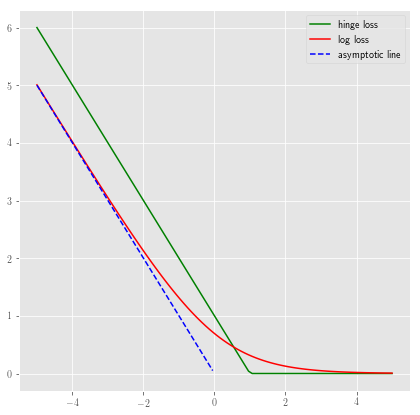

In [3]:
plt.rcParams['figure.figsize'] = (7,7)
x = np.linspace(-5,5,100)
y_hinge = Hinge(x)
y_log   = LogLoss(x)
plt.plot(x,y_hinge,c='g',label='hinge loss')
plt.plot(x,y_log,c='r',label='log loss')
plt.plot(x[x<=0],-x[x<=0], 'b--', label='asymptotic line')
plt.legend(loc=1)

<p><a name="svm-sklearn"></a></p>
## SVM in Scikit Learn

- In order to implement SVM in python, import **svm** module from sklearn library.

In [4]:
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
from sklearn import svm
svm_model = svm.SVC(kernel='poly', C=1e5, degree=1)
svm_model

SVC(C=100000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

- Here we choose the 'poly' kernel, and set the degree equals to 1, which means a linear boundary.
- $C=1e5$ is used to decrease the effect of the error term.

### Kernels

These are the kernels that sklearn offers:

- **linear**: $<x_1, x_2>$.
- **polynomial**: $(\gamma <x_1, x_2> + r)^d$. $d$ is specified by the argument `degree`, $r$ by `coef0`.
- **rbf**: $\exp(-\gamma \parallel x_1-x_2 \parallel^2)$. $\gamma$ is specified by the argument `gamma`, must be greater than 0.
- **sigmoid**: $(\tanh(\gamma <x_1,x_2> + r))$, where $r$ is specified by `coef0`.

The linear kernel is the original feature space. In terms of the polynomial kernel, it's equivalent to linear kernel when $\gamma=1$ and $r=0$.

### Arguments:

- **kernel**: Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given, it is used to precompute the kernel matrix.

- **C**: Penalty parameter of the error term. $C=1$ by default.

- **degree**: Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

### Methods:

- **fit**: Fit the SVM model according to the given training data.
- **score**: Return the mean accuracy on the given test data and labels.
- **predict**: Perform classification on samples in X.
- **set_params**: Set the parameters of this estimator.
- **get_params**: Get the parameters of this estimator.

### Attributes:

- **support\_**: return the index of the support vectors.
- **n\_support\_**: return the number of support vectors.
- **support\_vectors\_**: return the value of support vectors.

<p><a name="1case1"></a></p>
### Case 1: Binary Classification

We demonstrate the `svm` model on the first 100 observation of the iris data, which include two species.

In [5]:
import numpy as np
from sklearn import datasets
## prepare data
iris = datasets.load_iris()
index = range(100)
iris.x = iris.data[index, :]
iris.y = iris.target[index]
## fit
svm_model.fit(iris.x[:, 0:2], iris.y)

SVC(C=100000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
svm_model.score(iris.x[:, 0:2], iris.y)

1.0

In [7]:
svm_model.n_support_

array([2, 2], dtype=int32)

In [8]:
svm_index = svm_model.support_ # index of support vector
print('Index of support vector: ' + str(svm_index))

Index of support vector: [36 41 57 84]


In [9]:
## There are two support vectors in each class.

support = svm_model.support_vectors_ # value of support vector
print(support)

[[5.5 3.5]
 [4.5 2.3]
 [4.9 2.4]
 [5.4 3. ]]


In [10]:
iris.x[svm_model.support_, 0:2] # equivalent to svm_model.support_vectors_

array([[5.5, 3.5],
       [4.5, 2.3],
       [4.9, 2.4],
       [5.4, 3. ]])

Below we visualize the result:

In [11]:
from PlotFunctions import plot_model

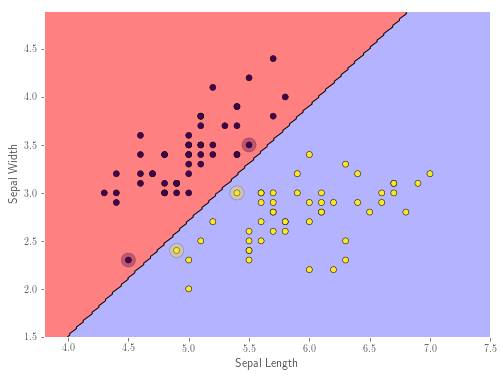

In [12]:
import  matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8, 6
svm_model.fit(iris.data[index, 0:2], iris.target[index])
plot_model(svm_model, iris.data[index, 0], iris.data[index, 1], iris.target[index])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

#### Change the Degree

This time we set *degree=3*, which results in a cubic boundary:

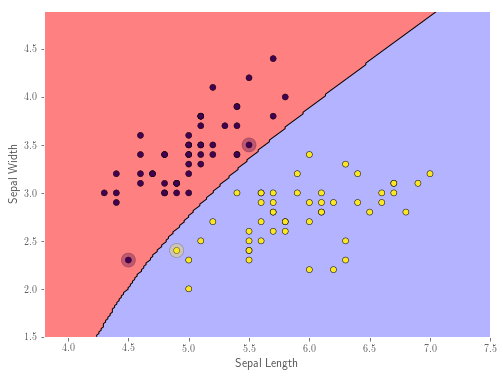

In [13]:
svm_model.set_params(degree=3)
svm_model.fit(iris.data[index, 0:2], iris.target[index])
plot_model(svm_model, iris.data[index, 0], iris.data[index, 1], iris.target[index])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

<p><a name="1ex1"></a></p>
### Exercise

With the `svm_model` from the previous slide:
- Compute the accuracy.

In [14]:
#### Your code here
svm_model.score(iris.data[index, 0:2], iris.target[index])

1.0

- Find out all the support vectors.

In [15]:
#### Your code here
svm_model.support_vectors_

array([[5.5, 3.5],
       [4.5, 2.3],
       [4.9, 2.4]])

- Which classes do they belong to?

In [16]:
#### Your code here
svm_model.predict(svm_model.support_vectors_)

array([0, 0, 1])

<p><a name="1case2"></a></p>
### Case 2: Multiclass Classification

- In cases of multiclass classification problem, **SVC** implements a *one vs one* approach.

- If there are $k$ different classes in total, then $\frac{k(k-1)}{2}$ classifiers are constructed.

For instance, 3 classes 0, 1 and 2 will result in 3 classifiers:

- class 0 VS class 1
- class 0 VS class 2
- class 1 VS class 2



This time we use all the observations in the iris data to build a multiclass classifier. And we choose the last two features "petal length" and "petal width".

In [17]:
svm_model.set_params(degree=1) # reset degree to 1 to build a linear classifier
svm_model.fit(iris.data[:, 2:4], iris.target) # fit on all the observations
svm_model.score(iris.data[:, 2:4], iris.target) # accuracy

0.96

In [18]:
## Make a prediction:
svm_model.predict([[1, 4]])

array([0])

Visualize the result:

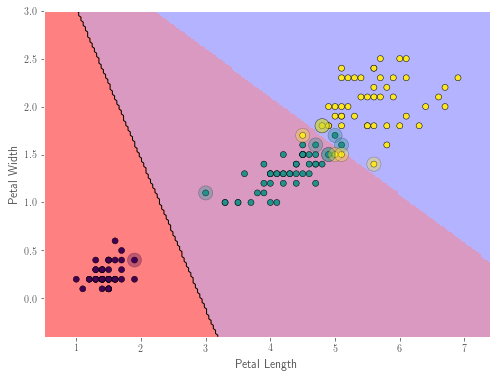

In [19]:
plot_model(svm_model, iris.data[:, 2], iris.data[:, 3], iris.target)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

<p><a name="1ex2"></a></p>
### Exercise

Predict the following observations with the model we created and then confirm the result with the visualization in the previous slide.
- petal length: 1.5, petal width: 0.5
- petal length: 4.0, petal width: 0.5
- petal length: 6.0, petal width: 2.5

In [20]:
#### Your code here

svm_model.predict([[1.5, 0.5], [4.0, 0.5], [6.0, 2.5]])

array([0, 1, 2])

Below we change to a different constant `C` (reset `C = 1` from `C=1e5` to decrease the effect of penalty)

In [21]:
svm_model.set_params(C=1)
svm_model.fit(iris.data[:, 2:4], iris.target) 
svm_model.score(iris.data[:, 2:4], iris.target) 

0.9666666666666667

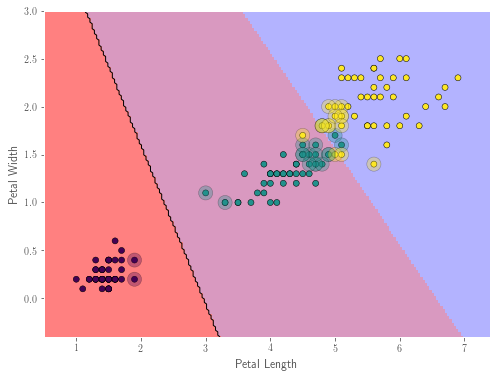

In [22]:
plot_model(svm_model, iris.data[:, 2], iris.data[:, 3], iris.target)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

<p><a name="1caes3"></a></p>
### Case 3: Grid Search

There are many parameters to be set in SVM:

- Which kernel.
- The value of $C. \quad$
- The degree in polynomial kernel.

We can use the function **grid_search.GridSearchCV** to select the best combination of parameters.

In [23]:
from sklearn import model_selection
grid_para_svm = [
    {'C': [1, 10, 100, 1000],
     'kernel': ['poly'],
     'degree': [1, 2, 3]},
    {'C': [1, 10, 100, 1000],
     'gamma': [0.001, 0.0001],
     'kernel': ['rbf']}
]

In [24]:
grid_search_svm = model_selection.GridSearchCV(svm_model, grid_para_svm, scoring='accuracy', cv=3, return_train_score=True,  n_jobs=-1)
grid_search_svm.fit(iris.data, iris.target)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [1, 2, 3]}, {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

Inspect the result of grid search.

In [25]:
print(list(grid_search_svm.cv_results_.keys()))
grid_search_svm.cv_results_

['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_degree', 'param_kernel', 'param_gamma', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score']


{'mean_fit_time': array([0.00290465, 0.00325632, 0.00395004, 0.00067441, 0.00076437,
        0.00261299, 0.00038997, 0.00150172, 0.0043927 , 0.00049225,
        0.00385038, 0.01342964, 0.00070524, 0.0007573 , 0.0005463 ,
        0.00070588, 0.00045371, 0.00047223, 0.00033323, 0.0004456 ]),
 'mean_score_time': array([0.00087412, 0.0012931 , 0.00085235, 0.00038735, 0.00040762,
        0.00029103, 0.0002443 , 0.00025558, 0.00025908, 0.00024811,
        0.00026735, 0.00029532, 0.00030677, 0.00036597, 0.0002807 ,
        0.00035119, 0.0002416 , 0.00026965, 0.00021315, 0.00029333]),
 'mean_test_score': array([0.96666667, 0.96666667, 0.96666667, 0.97333333, 0.96666667,
        0.96666667, 0.97333333, 0.96666667, 0.96      , 0.97333333,
        0.96666667, 0.96      , 0.91333333, 0.91333333, 0.94666667,
        0.91333333, 0.97333333, 0.94666667, 0.98666667, 0.97333333]),
 'mean_train_score': array([0.97682709, 0.97999604, 0.98336304, 0.98336304, 0.98336304,
        0.98673005, 0.98336304, 0.9

The best combination of parameters is:

In [26]:
grid_search_svm.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [27]:
## The best score is
grid_search_svm.best_score_

0.9866666666666667

In [28]:
## The performance on the original data set is:
grid_search_svm.score(iris.data, iris.target)

0.98

It seems `best_score_` from grid search is better than the score on the whole training data. Does that make sense?

In [29]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
lst1 = []
lst2 = []
for i in range(50):
    index = np.random.choice(range(150), size=150, replace=False)
    x = iris.data[index,:]
    y = iris.target[index]
    skf = StratifiedKFold(n_splits=3)
    grid_search_svm = GridSearchCV(svm_model, grid_para_svm, scoring='accuracy', cv=skf)
    grid_search_svm.fit(x, y)
    lst1.append(grid_search_svm.best_score_)
    lst2.append(grid_search_svm.score(x, y))

In [30]:
print(np.mean(lst1))
print(np.mean(lst2))

0.9779999999999999
0.9808


## SVR - Support Vector Regression
- **support vector regression** shares many common state parameters with **SVC**
- Unlike **SVC**, **SVR** has no **n_support**
- **support_**: the row indexes of the support vectors
- **support_vectors**, the numpy array of the rows of support vectors    
- The new parameter **epsilon** plays a crucial role in **SVR**
- $\epsilon$, a positive hyperparameter, controls the band within which the loss is zero
- We would like to test the robustness of **SVR** with respect to noises and outliers
- ${\bf dual\_coef\_}$: coefficients of the support vectors in the **SVR** approximated function

In [31]:
def Epsilon_Insensitive(a,b,epsilon):
    return(np.max([np.abs(a-b)-epsilon,np.zeros_like(a)],axis=0))

Text(1.2,0.1,'(1.0)')

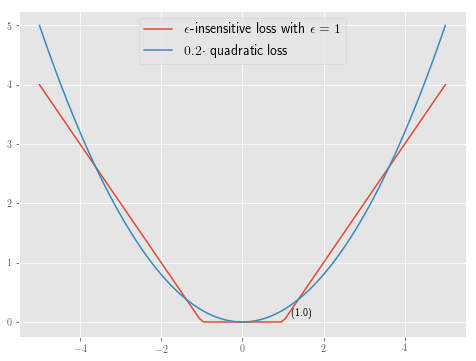

In [32]:
plt.rcParams['legend.fontsize'] = 14
x = np.linspace(-5,5,100)
y = Epsilon_Insensitive(x,np.zeros_like(x),1)
y2 = 0.2*x**2
plt.plot(x,y,label='$\epsilon$-insensitive loss with $\epsilon=1$')
plt.plot(x,y2,label='$0.2 \cdot $ quadratic loss')
plt.legend(loc=9)
plt.text(1.2,0.1,s='(1.0)')

In [33]:
from sklearn.svm import SVR

## Nonlinear Functions with Deterministic Noises and Gaussian Random Noises
- In the following we start with the linear function $f(x,y)=x+2y$ and add a deterministic nonlinear term $-4sin(xy)$
- We investigate how **SVR** estimates the nonlinear function with **rbf** kernel
- We spice up by adding a Gaussian noise and investigate whether **SVR** can learn the underyling nonlinear function 
successfully
- We also add an outlier artificially in the train-set
- The goal is to check if the learning algorithm can tolerate the appearance of sparse outlier and still learn the underlying nonlinear structure

In [34]:
def MyFunc(X,Y):
    Z = 3*np.sin(X*Y)  # deterministic noise
    return X+2*Y-4*Z


def MyFunc_withNoise(X,Y):
    Z = 3*np.sin(X*Y)  # deterministic noise
    return X+2*Y-4*Z+4*np.random.randn(*Z.shape) # adding Gaussian Noise

X  = np.random.randn(1000,2)  # X coordinates for the train set
X2 = np.random.randn(1000,2)  # X coordinates for the test set

Y  = MyFunc(X[:,0], X[:,1])
Y2 = MyFunc(X2[:,0], X2[:,1])
Y_noise = MyFunc_withNoise(X[:,0], X[:,1])

Y_outlier = Y.copy()
Y_outlier[0] = -1000  # add an outlier to check if the model will get affected

- The rationale of adding Gaussian noises/outlier is to simulate the **imperfection** in the data collection process

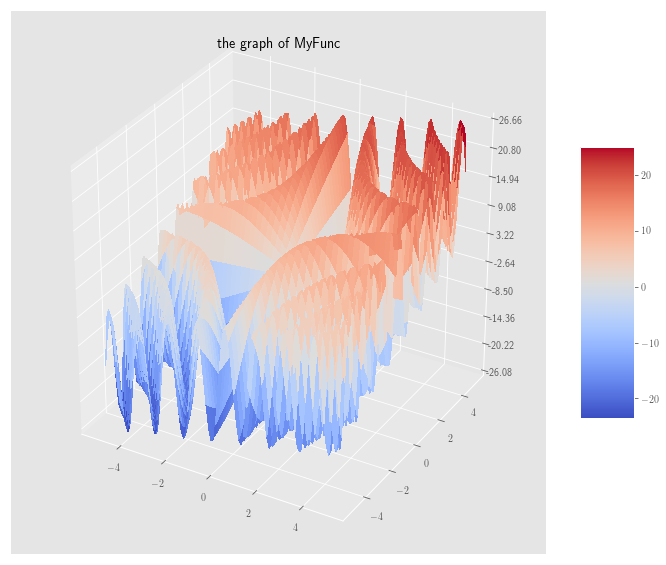

In [35]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
plt.rcParams['figure.figsize'] = (12,10)
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
A = np.linspace(-5,5,100)
B = np.linspace(-5,5,100)
A, B = np.meshgrid(A, B)
C = MyFunc(A,B)

# Plot the surface.
surf = ax.plot_surface(A, B, C, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('the graph of MyFunc')
plt.show()

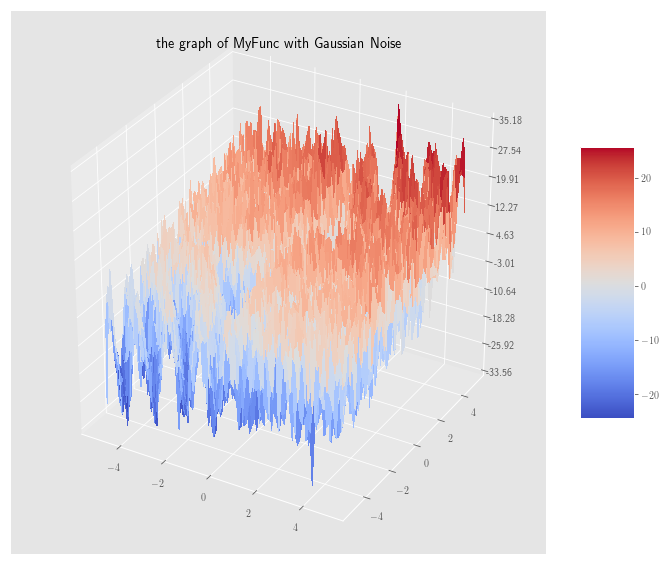

In [36]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
plt.rcParams['figure.figsize'] = (12,10)
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
A = np.linspace(-5,5,100)
B = np.linspace(-5,5,100)
A, B = np.meshgrid(A, B)
C = MyFunc_withNoise(A,B)

# Plot the surface.
surf = ax.plot_surface(A, B, C, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('the graph of MyFunc with Gaussian Noise')
plt.show()

- As a benchmark, we train a linear regression algorithm on these datum
- LinearRegression fails miserablly

In [37]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(X,Y)
print(ols.score(X,Y))
print(ols.coef_)  # For the linear part, the true coefficients are 1, 2

0.08603853586645516
[0.71617698 1.80612735]


- $R^2$ drops after introducing Gaussian noises

In [38]:
ols.fit(X,Y_noise)
print(ols.score(X,Y_noise))
print(ols.coef_)

0.06673999280850718
[0.41709786 1.9517842 ]


- $R^2$ becomes near $0$ after introducing a single outlier

In [39]:
ols.fit(X,Y_outlier)
print(ols.score(X,Y_outlier))
print(ols.score(X2,Y2))  
print(ols.coef_)  # the coefficients deviates from the true coefficients substantially

0.00023285896132041461
0.02167117115914552
[-0.20634978  0.44186164]


## Here We Begin to Train an SVR
- For simplicity we tune the two hyperparameters $\epsilon$ and $\gamma$ to reasonably good values

In [40]:
svr = SVR(epsilon = 1e-4, gamma=1)
svr.fit(X,Y)
print(svr.score(X,Y))
print(svr.score(X2,Y2))

0.9555838333676909
0.9420634626668662


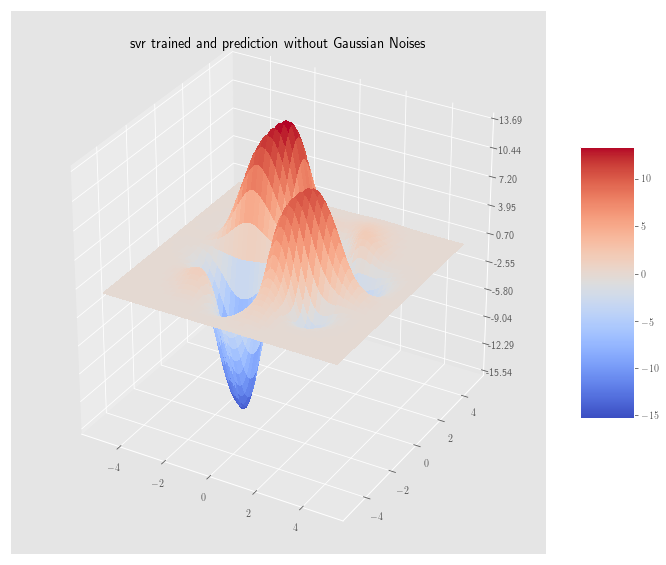

In [41]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
plt.rcParams['figure.figsize'] = (12,10)
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
A = np.linspace(-5,5,100)
B = np.linspace(-5,5,100)
A, B = np.meshgrid(A, B)
C = svr.predict(np.transpose(np.array([A.flatten(), B.flatten()]))).reshape((100,100))

# Plot the surface.
surf = ax.plot_surface(A, B, C, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('svr trained and prediction without Gaussian Noises')
plt.show()

In [42]:
svr = SVR(epsilon = 1e-4, gamma=1)
svr.fit(X,Y_noise) # fit the Y with Gaussian noises
print(svr.score(X,Y_noise))  # the R^2 for the train set
print(svr.score(X2,Y2))  # The R^2 for Y without Guassian Noise

0.6920583003995595
0.9058786755576005


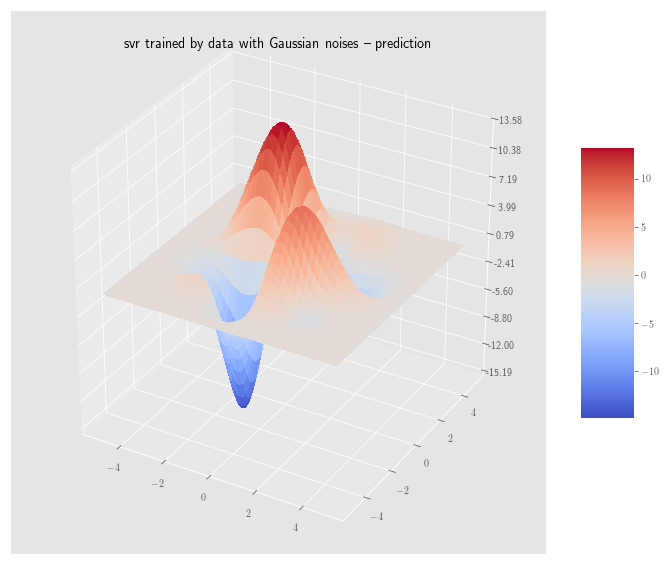

In [43]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
plt.rcParams['figure.figsize'] = (12,10)
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
A = np.linspace(-5,5,100)
B = np.linspace(-5,5,100)
A, B = np.meshgrid(A, B)
C = svr.predict(np.transpose(np.array([A.flatten(), B.flatten()]))).reshape((100,100))

# Plot the surface.
surf = ax.plot_surface(A, B, C, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('svr trained by data with Gaussian noises -- prediction')
plt.show()

- Notice that the prediction smooths out the deterministic noises
- The above Gaussian noise does not impact the learning too much

- The following **SVR** is trained with a train data tainted by a single outlier $y\mapsto -1000$
- Because the appearance of the outlier, the $R^2$ for the outlier tainted data drops to almost 0
- The single outlier hardly affects the $R^2$ on the **untainted data**
- This indicates the robustness of **SVR** in **ignoring** the outlier
- The test set performance without outlier is still steller

In [44]:
svr = SVR(epsilon = 1e-4, gamma=1)
svr.fit(X,Y_outlier)  # trained with the outlier included
print(svr.score(X,Y_outlier))
print(svr.score(X,Y))  # the R^2 without the outlier 
print('test set R2 without outliers %.4f' %(svr.score(X2,Y2))) # The R^2 on the test set without the outlier effect

0.05470088693038089
0.9555842654252317
test set R2 without outliers 0.9421


## The Effect of Tunning $\gamma$ and $\epsilon$
- Firstly we study the effect of changing $\epsilon$ on the behavior of **SVR**

In [45]:
R2 = []
n_support_epsilon = []
support_vectors_epsilon = []
epsilons = np.logspace(2,-2,20)
for epsilon in epsilons:
    svr.set_params(epsilon=epsilon, gamma=1)
    svr.fit(X,Y)
    R2.append(svr.score(X2,Y2))
    n_support_epsilon.append(svr.support_vectors_.shape[0])
    support_vectors_epsilon.append(svr.support_vectors_)

n_support_epsilon = np.array(n_support_epsilon)
support_vectors_epsilon = np.array(support_vectors_epsilon)
R2    

[-1.4316186476071024e-05,
 -1.4316186476293069e-05,
 -1.4316186476071024e-05,
 -1.4316186476071024e-05,
 0.08740088903906162,
 0.4803005268554571,
 0.7522686431216329,
 0.8654613045543775,
 0.9053014865405539,
 0.9234019329869531,
 0.9314154211005896,
 0.9359653750448281,
 0.9387911606605202,
 0.9403303878416079,
 0.9410016859509843,
 0.9418086622330117,
 0.9419315104951277,
 0.9420550657303788,
 0.9419920536313278,
 0.942063733455389]

In [46]:
n_support_epsilon>10

array([False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

Text(0,0.5,'Test set R^2')

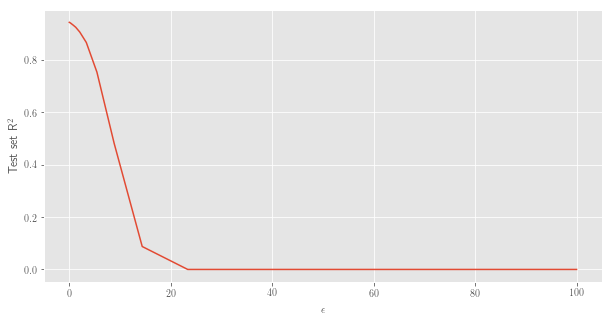

In [47]:
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(epsilons, R2)
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'Test set $R^2$')

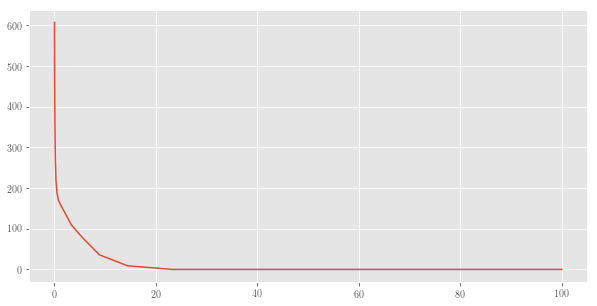

In [48]:
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(epsilons, n_support_epsilon)

## The Model Coefficients of SVR

The **SVR** tries to approximate the target nonlinear function through a linear combinations of the specified kernel functions
- The support vectors specify the **locations** of the kernel functions
- The nonlinear function it approximates is of the form 
- $$f(x)\sim \sum_{i\leq N}\alpha_i K(x, x_i)$$
- The coefficients $\alpha_i$ are zero **unless** $x_i$ are among the support vectors
- In **SVR**, the coefficients $\alpha_i$ are stored in the $dual\_coef\_$ attribute of the model object

## Soft Margin Regressor
- A soft margin **SVR** allows its support vectors to move out of the $\epsilon$-band of small errors
- This flexibility makes it easier for the solution to exist

In [49]:
svr.set_params(epsilon=1, gamma=1, C=1e-4)
svr.fit(X,Y)
print(svr.dual_coef_)  # alpha coefficients
print(svr.support_vectors_)  # corresponding support vectors

[[-0.0001 -0.0001  0.0001  0.0001  0.0001 -0.0001  0.0001  0.0001  0.0001
  -0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001 -0.0001  0.0001
   0.0001 -0.0001 -0.0001  0.0001 -0.0001  0.0001  0.0001  0.0001  0.0001
   0.0001  0.0001 -0.0001  0.0001  0.0001 -0.0001  0.0001  0.0001 -0.0001
  -0.0001 -0.0001  0.0001 -0.0001 -0.0001 -0.0001  0.0001  0.0001 -0.0001
  -0.0001 -0.0001  0.0001  0.0001 -0.0001 -0.0001 -0.0001  0.0001 -0.0001
   0.0001  0.0001  0.0001 -0.0001 -0.0001 -0.0001  0.0001  0.0001  0.0001
   0.0001 -0.0001  0.0001  0.0001  0.0001  0.0001 -0.0001 -0.0001 -0.0001
  -0.0001  0.0001  0.0001  0.0001 -0.0001  0.0001  0.0001 -0.0001 -0.0001
   0.0001 -0.0001  0.0001  0.0001  0.0001 -0.0001  0.0001  0.0001  0.0001
   0.0001  0.0001 -0.0001 -0.0001 -0.0001  0.0001  0.0001  0.0001  0.0001
   0.0001  0.0001 -0.0001  0.0001  0.0001  0.0001 -0.0001  0.0001 -0.0001
   0.0001  0.0001 -0.0001 -0.0001  0.0001  0.0001 -0.0001 -0.0001  0.0001
  -0.0001  0.0001  0.0001  0.0001  0.0

- In the context of **rbf** kernel, this means **SVR** estimates 
intercept + $\sum_{i\leq N}\alpha_i \cdot e^{-\gamma\lVert x-x_i\rVert^2}$ to approximate the target function

In [50]:
from sklearn.metrics.pairwise import rbf_kernel

Text(0.5,1,'hard margin regressor residuals with C = 0.0001')

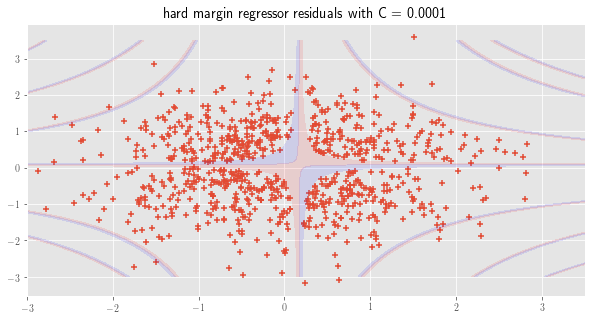

In [51]:
T = svr.support_vectors_
epsilon = 1
plt.scatter(T[:,0], T[:,1], marker='+')


def F(v, model): # for a square grid points of 2D vectors v
    alpha = model.dual_coef_
    return np.sum(alpha * rbf_kernel(v.reshape((-1,2)), model.support_vectors_, gamma=1),axis=1)
    

A = np.linspace(-3,3.5,100)
B = np.linspace(-3,3.5,100)
A, B = np.meshgrid(A,B)
W = np.concatenate((A.reshape(-1,1), B.reshape(-1,1)),axis=1)
U = MyFunc(A,B) - np.array([F(w, svr)+svr.intercept_ for w in W]).reshape(A.shape)
U2 = MyFunc(A,B) -svr.predict(W).reshape(A.shape)
plt.contourf(A,B,U,levels=[-epsilon, 0, epsilon], colors=['r','b','g'], alpha=0.1)
plt.title('soft margin regressor residuals with C = 0.0001')


- The blue band represents the contour values in [0,1]
- The red band represents the contour values in [-1,0]
- The above hard margin regressor has no margin violating support vectors, i.e. all the support vectors lie outside
the colored regions

## Hard Margin Regressor

- The Hard margin regressor does not allow margin-violating support vectors
- All the support vectors sit at the boundaries of the $\epsilon$-band of small errors
- This is to require that for all the samples, the errors are at most $\pm\epsilon$
- It is much harder for such a solution to exist that all samples lie in side the $\epsilon$-band
- In the following example, the contours of the errors are very sophisticated to make this happen!

Text(0.5,1,'soft margin regression residuals with C=1e4')

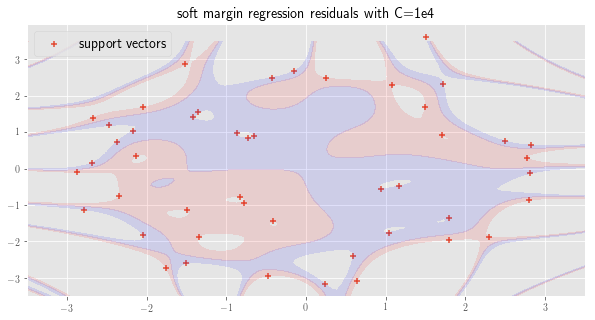

In [52]:
svr.set_params(epsilon=1, gamma=1, C=1e4)
svr.fit(X,Y)


T = svr.support_vectors_
epsilon = 1
plt.scatter(T[:,0], T[:,1], marker='+', label='support vectors')


def F(v, model): # for a square grid points of 2D vectors v
    alpha = model.dual_coef_
    return np.sum(alpha * rbf_kernel(v.reshape((-1,2)), model.support_vectors_, gamma=1),axis=1)
    

A = np.linspace(-3.5,3.5,100)
B = np.linspace(-3.5,3.5,100)
A, B = np.meshgrid(A,B)
W = np.concatenate((A.reshape(-1,1), B.reshape(-1,1)),axis=1)

U = MyFunc(A,B) - np.array([F(w, svr)+svr.intercept_ for w in W]).reshape(A.shape)
U2 = MyFunc(A,B) -svr.predict(W).reshape(A.shape) # almost the same sa U

plt.contourf(A,B,U,levels=[-epsilon, 0, epsilon], colors=['r','b','g'], alpha=0.1)
plt.legend(loc=2)
plt.title('hard margin regression residuals with C=1e4')


-0.3126164890920222 -0.3126164890920222


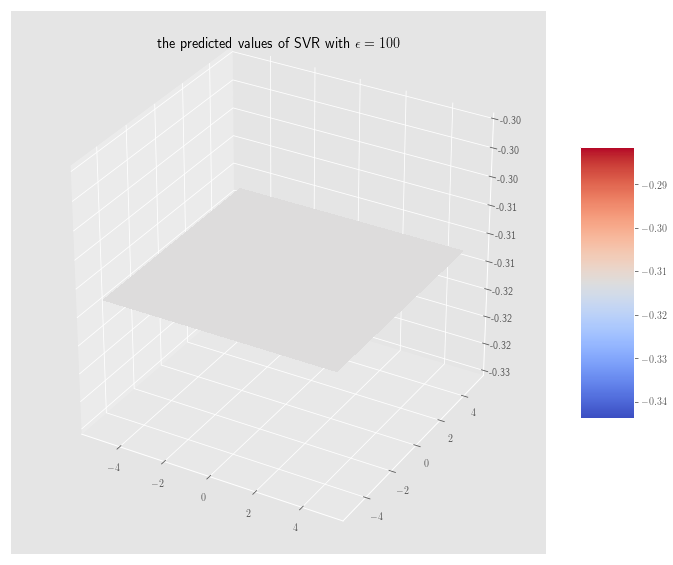

In [53]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
plt.rcParams['figure.figsize'] = (12,10)
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
A = np.linspace(-5,5,100)
B = np.linspace(-5,5,100)
A, B = np.meshgrid(A, B)
svr.set_params(epsilon=100)  # try what if epsilon changes to 15
svr.fit(X, Y)
C = svr.predict(np.transpose(np.array([A.flatten(), B.flatten()]))).reshape((100,100))
print(np.max(C), np.min(C))

# Plot the surface.
surf = ax.plot_surface(A, B, C, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title(r'the predicted values of SVR with \epsilon = 100')
plt.show()

### A 1-D grid search on $\gamma$ to record the test $R^2$ and their support vectors

In [54]:
svr

SVR(C=10000.0, cache_size=200, coef0=0.0, degree=3, epsilon=100, gamma=1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [55]:
R2 = []
n_support_gamma = []
support_vectors_gamma = []
svr.set_params(epsilon=1, tol=0.005, max_iter=-1)
gammas = np.logspace(2,-2,20)

for gamma in gammas:
    svr.set_params(gamma=gamma)
    svr.fit(X,Y)
    R2.append(svr.score(X2,Y2))
    n_support_gamma.append(svr.support_vectors_.shape[0])
    support_vectors_gamma.append(svr.support_vectors_)
n_support_gamma = np.array(n_support_gamma)    
support_vectors_gamma = np.array(support_vectors_gamma)    
R2   

[0.647066439301391,
 0.7552252403102546,
 0.8416627294100918,
 0.9001585442258235,
 0.932090135452995,
 0.9490864759982682,
 0.9619849823340396,
 0.972584420888846,
 0.9805321995300137,
 0.9836104269590044,
 0.9852172993159495,
 0.974386842819051,
 0.9546506440954505,
 0.9399078324090367,
 0.8337418562328841,
 0.863259120313701,
 0.7927523529677161,
 0.8290107656564103,
 0.7184942872212946,
 0.40280733157396403]

## The Effect of Tuning $\gamma$
- For small $\gamma$, the kernel function tends to underfit as it ignores all the nonlinear details
- It approximates the nonlinear function 'MyFunc' by a linear function
- In the other extreme when $\gamma$ goes too large, the model over-extrapolates the noises and ignores the global trend
- In this limit it ignores the linear trend and fits to the noises
- In both extremes, the test set $R^2$ are very poor

Text(0.5,1,'Test set $R^24$ vs $\\gamma$')

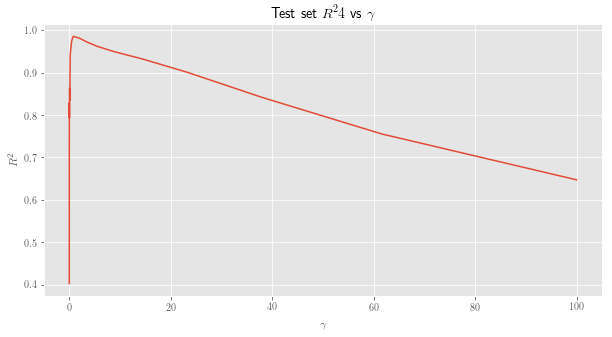

In [56]:
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(gammas, R2)
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$R^2$')
plt.title(r'Test set $R^24$ vs $\gamma$')

Text(0.5,1,'Counts of support vectors vs $\\gamma$')

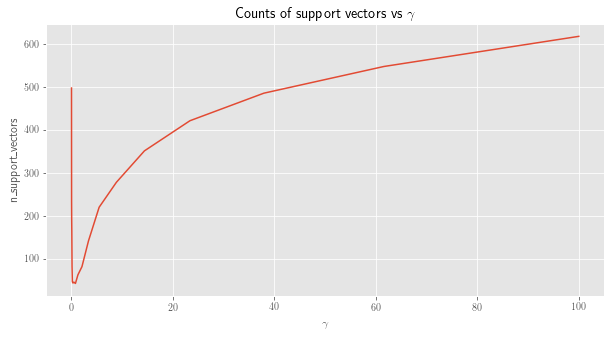

In [57]:
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(gammas, n_support_gamma)
plt.xlabel(r'$\gamma$')
plt.ylabel(r'n\_support\_vectors')
plt.title(r'Counts of support vectors vs $\gamma$')

- 3D plot of the predicted function with $\gamma=0.0001$

12.114175214875218 -16.36840755279161


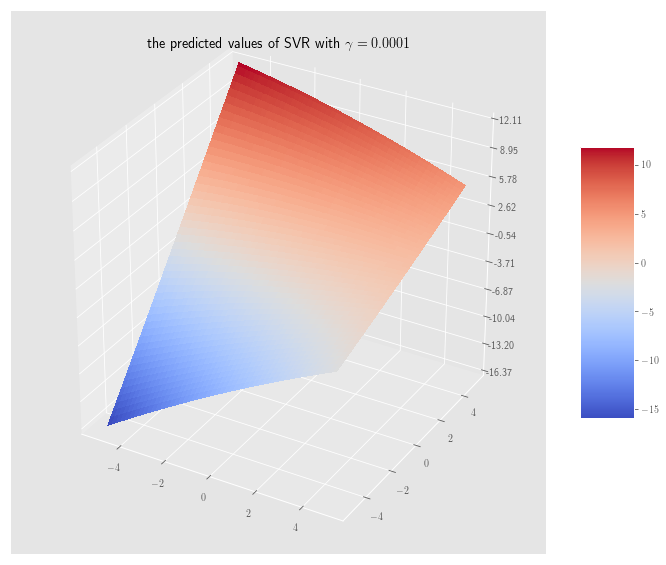

In [58]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
plt.rcParams['figure.figsize'] = (12,10)
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
A = np.linspace(-5,5,100)
B = np.linspace(-5,5,100)
A, B = np.meshgrid(A, B)
svr.set_params(gamma=1e-4)  # try what if epsilon changes to 15
svr.fit(X, Y)
C = svr.predict(np.transpose(np.array([A.flatten(), B.flatten()]))).reshape((100,100))
print(np.max(C), np.min(C))

# Plot the surface.
surf = ax.plot_surface(A, B, C, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title(r'the predicted values of SVR with \gamma = 0.0001')
plt.show()

- 3D plot of approximated function with $\gamma=0.01$

89.84354070302888 -61.124242738925574


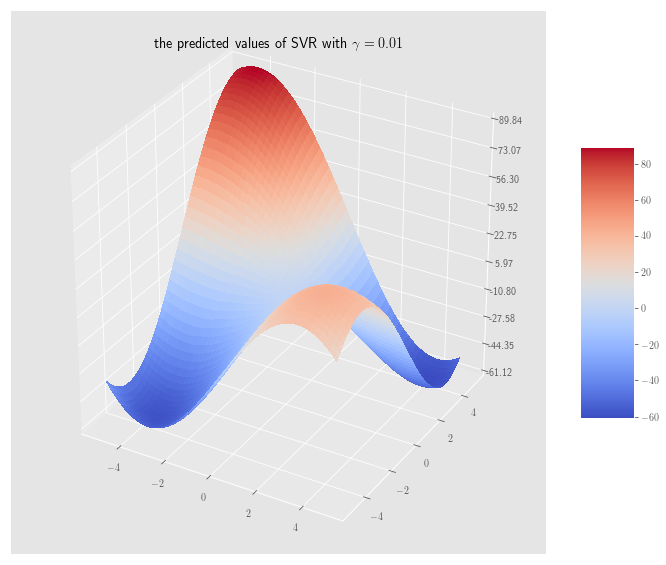

In [59]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
plt.rcParams['figure.figsize'] = (12,10)
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
A = np.linspace(-5,5,100)
B = np.linspace(-5,5,100)
A, B = np.meshgrid(A, B)
svr.set_params(gamma=1e-2)  # try what if epsilon changes to 15
svr.fit(X, Y)
C = svr.predict(np.transpose(np.array([A.flatten(), B.flatten()]))).reshape((100,100))
print(np.max(C), np.min(C))

# Plot the surface.
surf = ax.plot_surface(A, B, C, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title(r'the predicted values of SVR with \gamma = 0.01')
plt.show()

- 3D plot of the predicted function with $\gamma=0.1$

175.0092089895615 -244.7622778755939


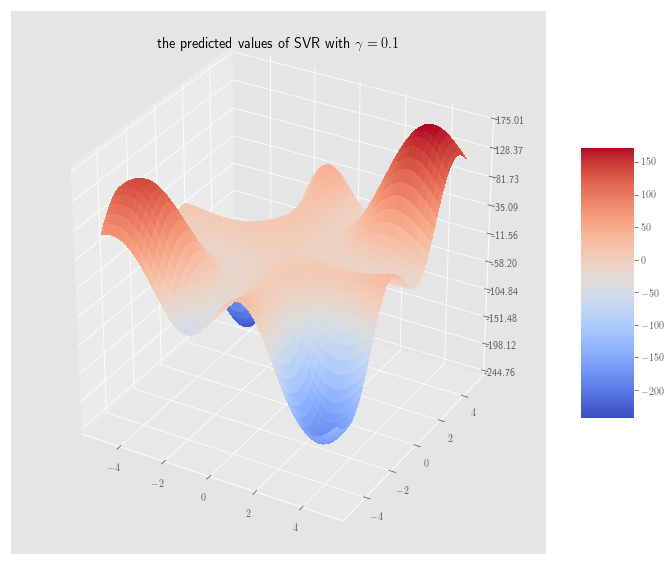

In [60]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
plt.rcParams['figure.figsize'] = (12,10)
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
A = np.linspace(-5,5,100)
B = np.linspace(-5,5,100)
A, B = np.meshgrid(A, B)
svr.set_params(gamma=1e-1)  # try what if epsilon changes to 15
svr.fit(X, Y)
C = svr.predict(np.transpose(np.array([A.flatten(), B.flatten()]))).reshape((100,100))
print(np.max(C), np.min(C))

# Plot the surface.
surf = ax.plot_surface(A, B, C, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title(r'the predicted values of SVR with \gamma = 0.1')
plt.show()

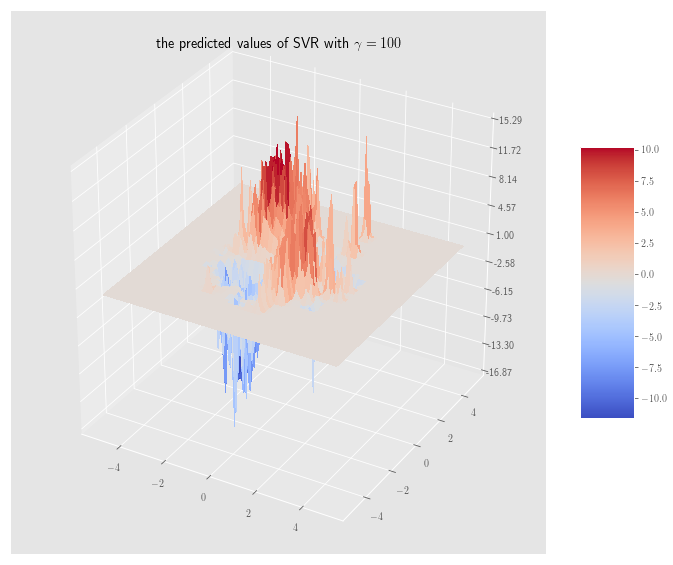

In [61]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
plt.rcParams['figure.figsize'] = (12,10)
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
A = np.linspace(-5,5,100)
B = np.linspace(-5,5,100)
A, B = np.meshgrid(A, B)
svr.set_params(gamma=100)  # try what if epsilon changes to 15
svr.fit(X, Y)
C = svr.predict(np.transpose(np.array([A.flatten(), B.flatten()]))).reshape((100,100))


# Plot the surface.
surf = ax.plot_surface(A, B, C, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title(r'the predicted values of SVR with \gamma = 100')
plt.show()

- To find the optimial hyperparameters, we can perform a **GridSearch** on both $\gamma$ and $\epsilon$ to choose the best combinations
- For simplicity we perform a train-test split instead of a **CV**

In [62]:
M, M2 = 12, 12

gammas = np.logspace(3, -3, M)
epsilons = np.logspace(3, -3, M2)
scores_gaps = []
for gamma in gammas:
    for epsilon in epsilons:
            svr.set_params(gamma=gamma, epsilon=epsilon)
            svr.fit(X,Y)
            scores_gaps.append(svr.score(X,Y)-svr.score(X2,Y2)) # train R^2 and test R^2 gaps
scores_gaps = np.array(scores_gaps).reshape((M, M2))            

## The Following 3D Plot Describes the Train-Test $R^2$ Gaps in a Grid Search
- We scan the log10 grid search on both $\gamma$ and $\epsilon$ to compute the train-test $R^2$ gaps and plot them in a 3D plot

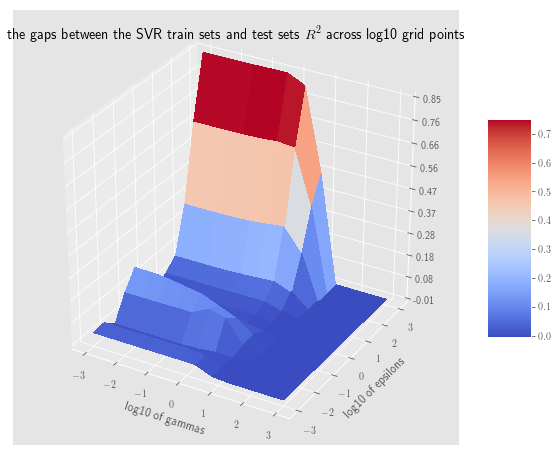

In [63]:
plt.rcParams['figure.figsize'] = (10,8)
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
A, B = np.meshgrid(np.log10(gammas), np.log10(epsilons))

# Plot the surface.
surf = ax.plot_surface(A, B, scores_gaps, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.xlabel('log10 of gammas')
plt.ylabel('log10 of epsilons')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title(r'the gaps between the SVR train sets and test sets $R^2$ across log10 grid points')
plt.show()

## Digestion
- A positive gap represents a gap of $R^2$ between the train set and the test set, which is **over-fitting**
- Only when the gap approaches zero, the overfitting becomes insignificant, this is depicted as darker blue in the above picture
- Among all the hyperparameter choices with minimal over-fitting, we need to figure out the best performer